In [3]:
# should we find min, max, std dev, covariance, correlation for the features in this case?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('../data/processed/aggregated_dataset.csv')

cir_features = dataset.columns[15:]

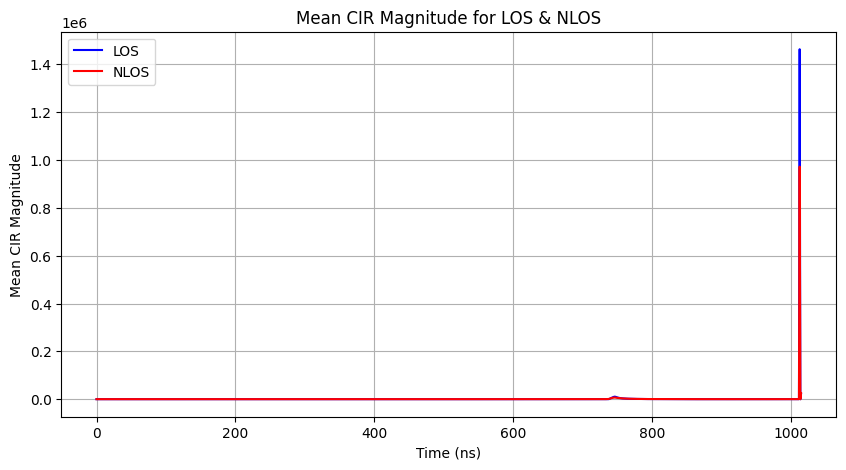

In [4]:
# Calculate mean CIR magnitude for each nanosecond
los_cir_office_data = dataset[dataset['NLOS'] == 0][cir_features]
nlos_cir_office_data = dataset[dataset['NLOS'] == 1][cir_features]

y_los = los_cir_office_data.mean()
y_nlos = nlos_cir_office_data.mean()

time_ns = np.arange(len(y_los))

plt.figure(figsize=(10, 5))
plt.plot(time_ns, y_los, label='LOS', color='blue')
plt.plot(time_ns, y_nlos, label='NLOS', color='red')
plt.xlabel('Time (ns)')
plt.ylabel('Mean CIR Magnitude')
plt.title('Mean CIR Magnitude for LOS & NLOS')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Discard columns with less than difference of 100 (???)
for i in range(0, len(y_los)):
    diff = y_los[f'CIR{i}'] - y_nlos[f'CIR{i}']
    if diff > 100 or diff < -100:
        print(f'CIR{i}', y_los[f'CIR{i}'] - y_nlos[f'CIR{i}'])

KeyError: 'CIR0'

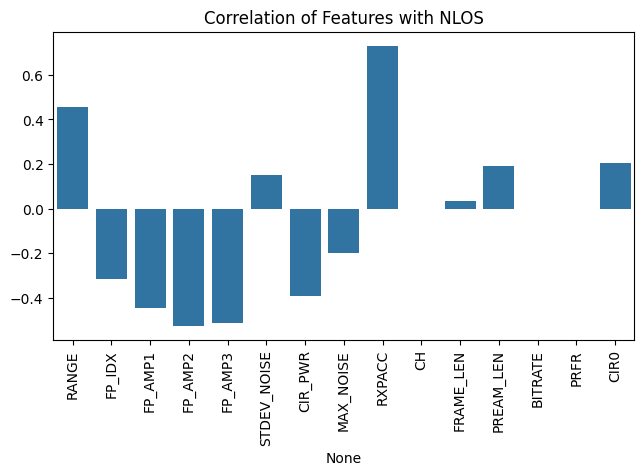

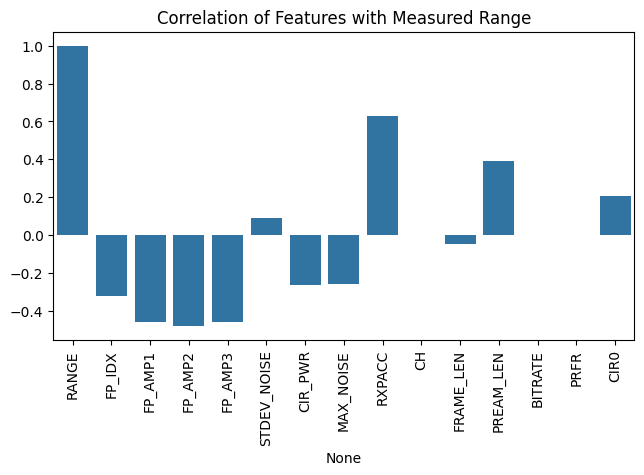

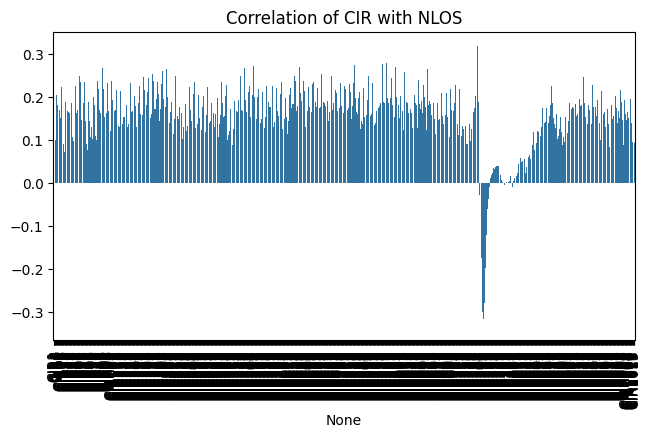

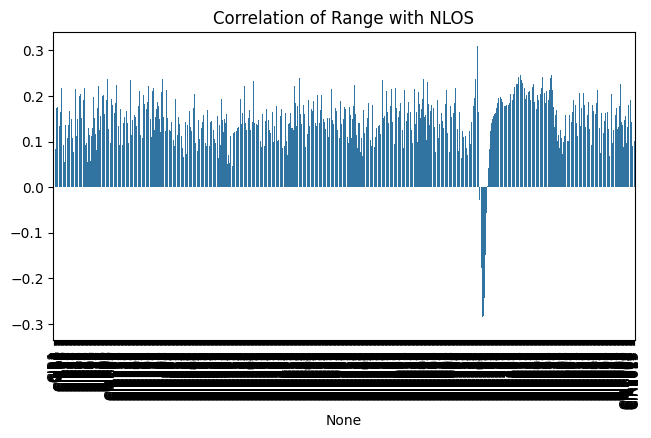

In [ ]:
# Check which features are irrelevant to labels
import seaborn as sns

correlation_nlos = dataset.iloc[:, 1:16].corrwith(dataset['NLOS'])
correlation_range = dataset.iloc[:, 1:16].corrwith(dataset['RANGE'])
correlation_nlos_with_cir = dataset.iloc[:, 16:].corrwith(dataset['NLOS'])
correlation_range_with_cir = dataset.iloc[:, 16:].corrwith(dataset['RANGE'])

plt.figure(figsize=(7.5, 4))
sns.barplot(x=correlation_nlos.index, y=correlation_nlos.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with NLOS')
plt.show()

plt.figure(figsize=(7.5, 4))
sns.barplot(x=correlation_range.index, y=correlation_range.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with Measured Range')
plt.show()

plt.figure(figsize=(7.5, 4))
sns.barplot(x=correlation_nlos_with_cir.index, y=correlation_nlos_with_cir.values)
plt.xticks(rotation=90)
plt.title('Correlation of CIR with NLOS')
plt.show()

plt.figure(figsize=(7.5, 4))
sns.barplot(x=correlation_range_with_cir.index, y=correlation_range_with_cir.values)
plt.xticks(rotation=90)
plt.title('Correlation of Range with NLOS')
plt.show()

# correlation = dataset.iloc[:, :15].corr()

# axis_corr = sns.heatmap(correlation, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(50, 500, n=500), square=True)

# plt.show()